In [18]:
import pandas as pd

base_census = pd.read_csv('census.csv')
base_census

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [2]:
import numpy as np

np.unique(base_census['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

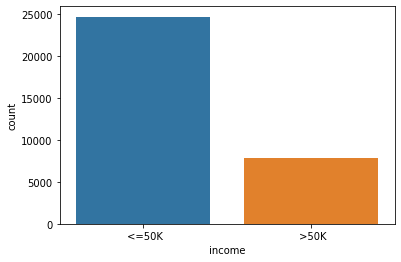

In [3]:
import seaborn as sns

sns.countplot(x = base_census['income']);

In [19]:
X_census = base_census.iloc[:,0:14].values
y_census = base_census.iloc[:,14].values

In [20]:
from sklearn.preprocessing import LabelEncoder

label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

X_census[:,1] = label_encoder_workclass.fit_transform(X_census[:,1])
X_census[:,3] = label_encoder_education.fit_transform(X_census[:,3])
X_census[:,5] = label_encoder_marital.fit_transform(X_census[:,5])
X_census[:,6] = label_encoder_occupation.fit_transform(X_census[:,6])
X_census[:,7] = label_encoder_relationship.fit_transform(X_census[:,7])
X_census[:,8] = label_encoder_race.fit_transform(X_census[:,8])
X_census[:,9] = label_encoder_sex.fit_transform(X_census[:,9])
X_census[:,13] = label_encoder_country.fit_transform(X_census[:,13])

In [9]:
X_census.shape, y_census.shape

((32561, 14), (32561,))

## Undersampling - TomekLinks

In [10]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='all')
X_under, y_under = tl.fit_resample(X_census, y_census)

In [11]:
X_under.shape, y_under.shape

((27759, 14), (27759,))

In [12]:
np.unique(y_census, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

In [13]:
np.unique(y_under, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([22319,  5440]))

In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

onehotencorder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [1,3,5,6,7,8,9,13])],remainder='passthrough')
X_census = onehotencorder.fit_transform(X_under).toarray()

In [15]:
from sklearn.model_selection import train_test_split

X_census_treinamento_under, X_census_teste_under, y_census_treinamento_under, y_census_teste_under = train_test_split(X_under, y_under, test_size=0.15, random_state=0)
X_census_treinamento_under.shape, X_census_teste_under.shape

((23595, 14), (4164, 14))

In [16]:
# 84.7
from sklearn.ensemble import RandomForestClassifier

random_forest_census = RandomForestClassifier(criterion = 'entropy', min_samples_leaf =  1, min_samples_split = 5, n_estimators = 100)
random_forest_census.fit(X_census_treinamento_under, y_census_treinamento_under)

RandomForestClassifier(criterion='entropy', min_samples_split=5)

In [17]:
from sklearn.metrics import accuracy_score, classification_report

previsoes = random_forest_census.predict(X_census_teste_under)
accuracy_score(y_census_teste_under, previsoes)

0.8916906820365034

In [ ]:
print(classification_report(y_census_teste_under, previsoes))

## Oversampling - SMOTE

In [8]:
import numpy as np

In [49]:
X_census.shape, y_census.shape

((32561, 14), (32561,))

In [4]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_over, y_over = smote.fit_resample(X_census, y_census)

In [5]:
X_over.shape, y_over.shape

((49440, 14), (49440,))

In [21]:
np.unique(y_census, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

In [22]:
np.unique(y_over, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720, 24720]))

In [23]:
from sklearn.model_selection import train_test_split

X_census_treinamento_over, X_census_teste_over, y_census_treinamento_over, y_census_teste_over = train_test_split(X_over, y_over, test_size=0.15, random_state=0)
X_census_treinamento_over.shape, X_census_teste_over.shape

((42024, 14), (7416, 14))

In [24]:
from sklearn.ensemble import RandomForestClassifier

random_forest_census = RandomForestClassifier(criterion = 'entropy', min_samples_leaf =  1, min_samples_split = 5, n_estimators = 100)
random_forest_census.fit(X_census_treinamento_over, y_census_treinamento_over)

RandomForestClassifier(criterion='entropy', min_samples_split=5)

In [26]:
from sklearn.metrics import accuracy_score, classification_report

previsoes = random_forest_census.predict(X_census_teste_over)
accuracy_score(y_census_teste_over, previsoes)

0.910059331175836

In [27]:
print(classification_report(y_census_teste_over, previsoes))

              precision    recall  f1-score   support

       <=50K       0.90      0.93      0.91      3722
        >50K       0.92      0.89      0.91      3694

    accuracy                           0.91      7416
   macro avg       0.91      0.91      0.91      7416
weighted avg       0.91      0.91      0.91      7416

